# Diseño de un filtro óptimo equiripple FIR con fase lineal


Nos interesa diseñar un filtro con parámetros $\delta_1 = \delta_2$ ("equiripple"), $\omega_p = 0.2\pi$ y $\omega_s = 0.3\pi$, y de orden $M = 61$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, log10
from scipy.signal import remez, firwin, freqz
%matplotlib inline

In [2]:
M = 61
# remez function ask for frequencies in (normalized) hertz
f_p = 0.2 
f_s = 0.3 
h_pc = remez(M, (0, f_p, f_s, 1), (1, 0), (1, 1), Hz=2)

Comparemos este filtro con uno diseñado usando el método de la ventana y una venta Hanning

In [3]:
h_w = firwin(M, f_p, window='hann')

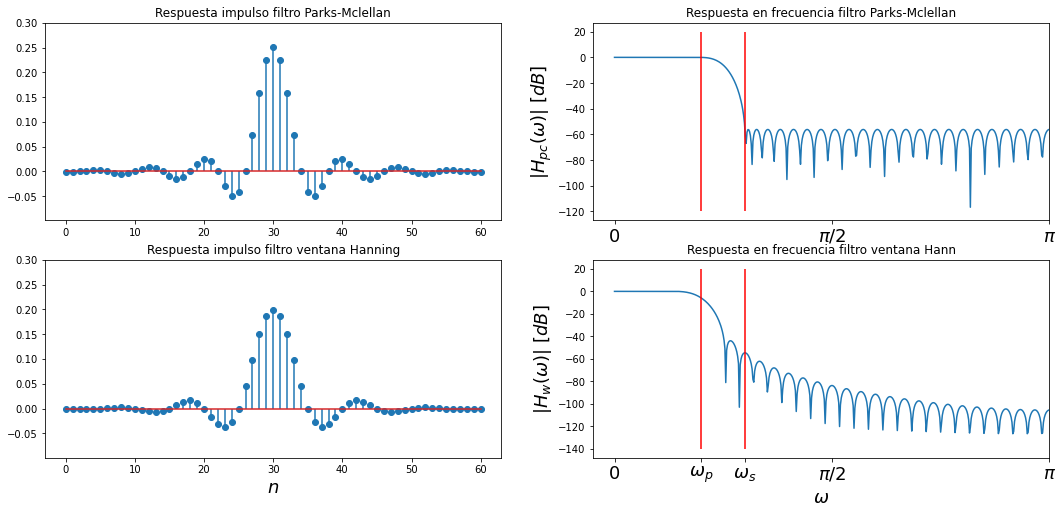

In [4]:
w_pc, H_pc = freqz(h_pc, 1)
w_w, H_w = freqz(h_w, 1)
H_pc, H_w = np.abs(H_pc), np.abs(H_w)
_, axs = plt.subplots(2, 2, figsize=(18,8))
n = np.arange(0, len(h_pc))
axs[0,0].stem(n, h_pc)
axs[1,0].stem(n, h_w)
axs[0,1].plot(w_pc, 20*log10(H_pc))
axs[1,1].plot(w_w, 20*log10(H_w))
h_min, h_max = min(h_pc.min(), h_w.min()) - 0.05, max(h_pc.max(), h_w.max()) + 0.05
axs[0,0].set_ylim(h_min, h_max)
axs[1,0].set_ylim(h_min, h_max)
axs[1,0].set_xlabel('$n$', fontsize=18)
axs[0,1].set_xlim(xmax=pi)
axs[1,1].set_xlim(xmax=pi)
axs[1,1].set_xlabel('$\omega$', fontsize=18)
axs[1,1].set_xticks(([0, f_p*pi, f_s*pi, pi/2, pi]))
axs[1,1].set_xticklabels(('0', '$\omega_p$', '$\omega_s$', r'$\pi/2$', r'$\pi$'), fontsize=18)
axs[0,1].set_xticks(([0, pi/2, pi]))
axs[0,1].set_xticklabels(('0', r'$\pi/2$', r'$\pi$'), fontsize=18)
axs[0,0].set_title('Respuesta impulso filtro Parks-Mclellan')
axs[1,0].set_title('Respuesta impulso filtro ventana Hanning')
axs[0,1].set_title('Respuesta en frecuencia filtro Parks-Mclellan')
axs[1,1].set_title('Respuesta en frecuencia filtro ventana Hann')
axs[0,1].set_ylabel('$|H_{pc}(\omega)| \ [dB]$', fontsize=18)
axs[1,1].set_ylabel('$|H_w(\omega)| \ [dB]$', fontsize=18)
axs[0,1].vlines(f_p*pi, -120, 20, color='r')
axs[0,1].vlines(f_s*pi, -120, 20, color='r')
axs[1,1].vlines(f_p*pi, -140, 20, color='r')
axs[1,1].vlines(f_s*pi, -140, 20, color='r')

## Efecto de $M$, $W(\omega)$, $\omega_p$ y $\omega_s$ en la respuesta del filtro

Primero fijemos  $M$, $\omega_p$ y $\omega_s$, y veamos el efecto de cambiar $W(\omega)$

In [5]:
M = 13
f_p, f_s = 0.4, 0.5
Ws = [(1,1), (2,1), (0.5,1)]
hs = []
for W in Ws:
    hs.append(remez(M, (0, f_p, f_s, 1), (1, 0), W, Hz=2))

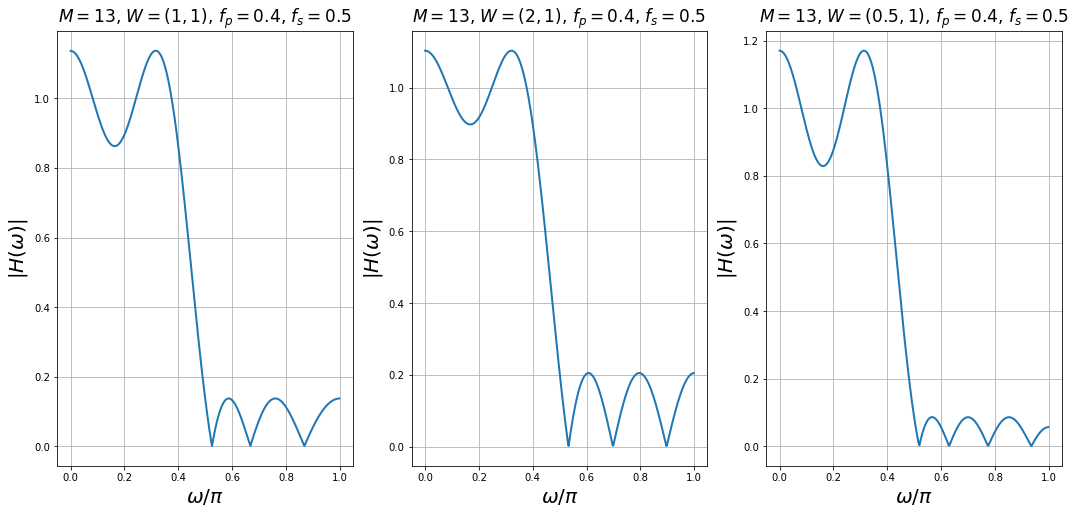

In [6]:
_, axs = plt.subplots(1, 3, figsize=(18,8))
for ax, h, w in zip(axs, hs, Ws):
    omega, H = freqz(h, 1)
    ax.plot(omega/pi, np.abs(H), lw=2)     
    ax.set_xlabel('$\omega / \pi$', fontsize=20)
    ax.set_ylabel('$|H(\omega)$|', fontsize=20)
    title = r'$M=%d$, $W=%s$, $f_p=%.1f$, $f_s=%.1f$' % (M, str(w), f_p, f_s)
    ax.set_title(title, fontsize=17)
    ax.grid()

Efecto de cambiar $\omega_s$:

In [7]:
M = 13
f_p= 0.4
f_ss = [0.55, 0.65, 0.75]
W = (1,1)
hs = []
for f_s in f_ss:
    hs.append(remez(M, (0, f_p, f_s, 1), (1, 0), W, Hz=2))

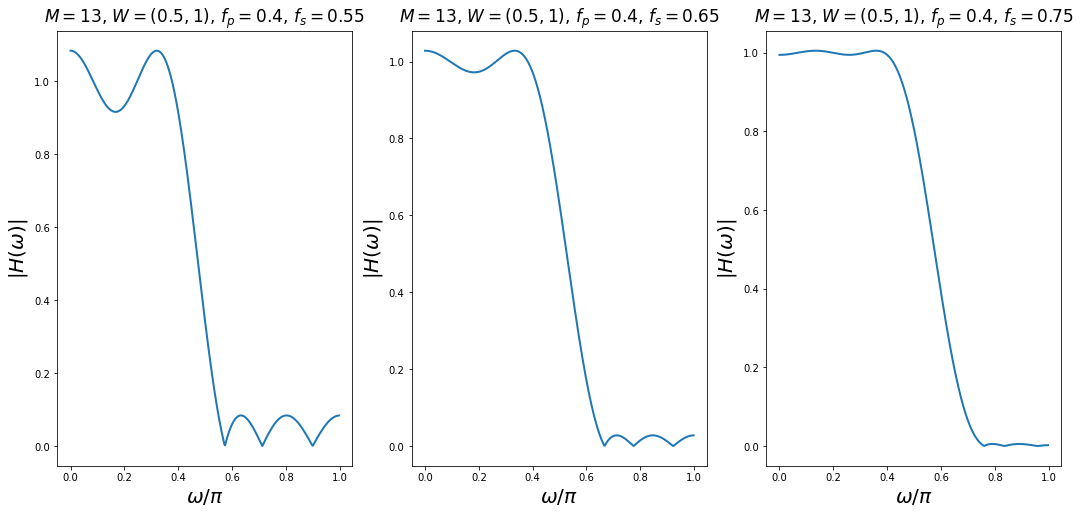

In [8]:
_, axs = plt.subplots(1, 3, figsize=(18,8))
for ax, h, f_s in zip(axs, hs, f_ss):
    omega, H = freqz(h, 1)
    ax.plot(omega/pi, np.abs(H), lw=2)     
    ax.set_xlabel('$\omega / \pi$', fontsize=20)
    ax.set_ylabel('$|H(\omega)$|', fontsize=20)
    title = r'$M=%d$, $W=%s$, $f_p=%.1f$, $f_s=%.2f$' % (M, str(w), f_p, f_s)
    ax.set_title(title, fontsize=17)

Efecto de cambiar $M$

In [11]:
Ms = [13, 27, 55]
f_p = 0.4
f_s = 0.5
W = (1,1)
hs = []
for M in Ms:
    hs.append(remez(M, (0, f_p, f_s, 1), (1, 0), W, Hz=2))

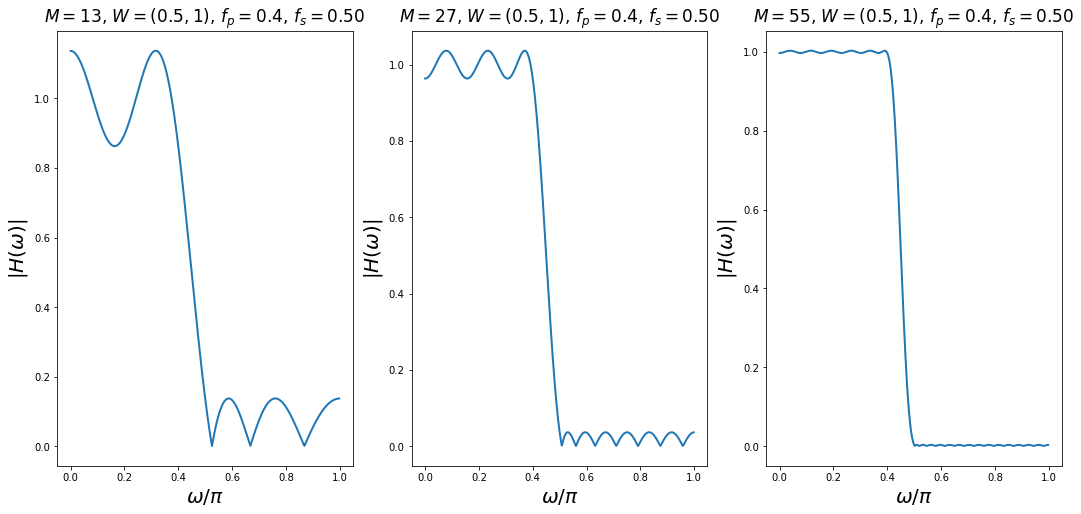

In [12]:
_, axs = plt.subplots(1, 3, figsize=(18,8))
for ax, h, M in zip(axs, hs, Ms):
    omega, H = freqz(h, 1)
    ax.plot(omega/pi, np.abs(H), lw=2)     
    ax.set_xlabel('$\omega / \pi$', fontsize=20)
    ax.set_ylabel('$|H(\omega)$|', fontsize=20)
    title = r'$M=%d$, $W=%s$, $f_p=%.1f$, $f_s=%.2f$' % (M, str(w), f_p, f_s)
    ax.set_title(title, fontsize=17)